In [25]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
#from configs.RecursiveVPSDE.Markovian_fQuadSinHF.recursive_Markovian_PostMeanScore_fQuadSinHF2_LowFTh_T256_H05_tl_110data_StbleTgt_FULLDATA import get_config
#from configs.RecursiveVPSDE.Markovian_fSinLog.recursive_Markovian_PostMeanScore_fSinLog_LowFTh_T256_H05_tl_110data_StbleTgt_FULLDATA import get_config
from configs.RecursiveVPSDE.Markovian_fBiPot.recursive_Markovian_PostMeanScore_fBiPot_LowFTh_T256_H05_tl_110data_StbleTgt_FULLDATA import get_config

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
from IPython.core.magic import register_cell_magic

@register_cell_magic
def skip(line, cell):
    return

In [27]:
config = get_config()
root_dir ="/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/"
hermite_dir = root_dir + "ExperimentResults/Ridge/"
if "SinLog" in config.data_path:
    diradd = "SinLog"
elif "QuadSin" in config.data_path:
    diradd = "QuadSinHF"
elif "BiPot" in config.data_path:
    diradd = "BiPot"
if config.diffusion == 0.1:
        diradd+= "LowNoise"
elif config.diffusion == 10.:
    diradd += "HighNoise"
hermite_dir += diradd+"/"
print(hermite_dir)

/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/Ridge/BiPot/


In [33]:
for f in os.listdir(hermite_dir):
    assert "1024NPath" not in f
    assert "Diff" not in f
    if "T_MSEs" in f:
        print(hermite_dir+f)
        mse = pd.read_parquet(hermite_dir+f, engine="fastparquet")

AssertionError: 

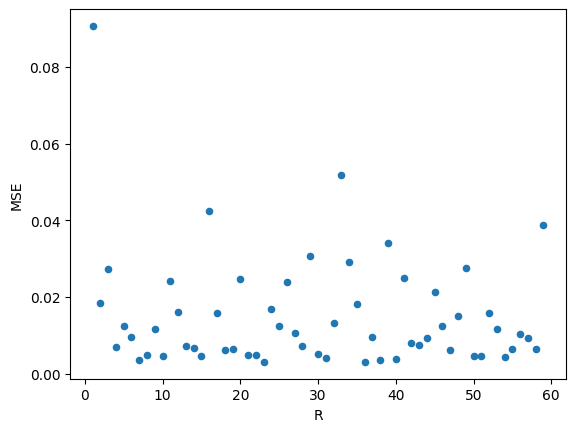

In [29]:
mse.reset_index(drop=False).plot(kind="scatter", x="index", y="0")
plt.xlabel("R")
plt.ylabel("MSE")
plt.show()
plt.close()

In [30]:
print(mse)
R = mse.dropna().iloc[np.argmin(mse.dropna().values.flatten())]
print("\n")
print(R)

              0
index          
1      0.090718
2      0.018440
3      0.027300
4      0.006980
5      0.012447
6      0.009600
7      0.003610
8      0.004801
9      0.011751
10     0.004459
11     0.024269
12     0.016129
13     0.007182
14     0.006606
15     0.004534
16     0.042355
17     0.015827
18     0.006084
19     0.006286
20     0.024645
21     0.004964
22     0.004849
23     0.003029
24     0.016757
25     0.012482
26     0.023924
27     0.010465
28     0.007284
29     0.030705
30     0.005011
31     0.004000
32     0.013072
33     0.051702
34     0.029044
35     0.018024
36     0.003068
37     0.009620
38     0.003500
39     0.034084
40     0.003914
41     0.024999
42     0.007863
43     0.007385
44     0.009401
45     0.021190
46     0.012373
47     0.006149
48     0.014951
49     0.027525
50     0.004624
51     0.004480
52     0.015711
53     0.011523
54     0.004243
55     0.006360
56     0.010298
57     0.009318
58     0.006402
59     0.038714


0    0.003029
Name: 23

In [31]:
try:
    R = R.name
except AttributeError:
    pass
num_paths = 10240
save_path = hermite_dir + f"Ridge_f{diradd}_DriftEvalExp_{num_paths}NPaths_{config.deltaT:.3e}dT".replace(".", "")
all_hermite_drifts = np.load(save_path + f"_{R}_drift_est.npy")
all_true_drifts=np.load(save_path + f"_{R}_true_drift.npy", allow_pickle=True)
all_true_paths = np.load(save_path + f"_{R}_true_paths.npy", allow_pickle=True)

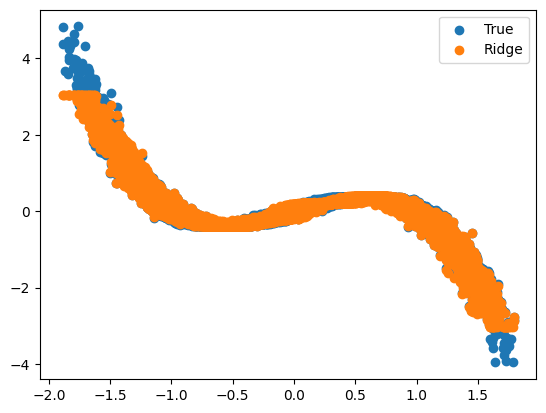

In [32]:
plt.scatter(all_true_paths.flatten(), all_true_drifts.flatten(), label="True")
plt.scatter(all_true_paths.flatten(), all_hermite_drifts.flatten(), label="Ridge")
plt.legend()
plt.show()